# Microsoft Stock Price Case Study

## Context

Companies' worth or its total market value is called market capitalization or market cap. It is equal to the share price multiplied by the number of shares outstanding. Stock price is a proportional and relative  value of companies' growth. Here, analysing the stock price data will help us to understand a company's growth. Increase in stock price increases the company's market value.

## Problem statement

We have Collected the latest data of Microsoft Stock price and calculated daily log return which is approximately  normally distributed. Let us try to answer some of the question that will help us to decide roughly whether to invest in the Microsoft shares or not?

a) What is the probability that the stock price will drop over 5% in a day? 

b) What is the probability that the stock price will drop over 10% in a day?
 
c) What is the probability that the stock price will drop over 50% in a year? 

d) What is the probability that the stock price will drop over 25% in a year?

e) What is the 50th percentile  of the yearly stock price?

In [1]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy.stats as stats


In [2]:
# Loading the stock price dataset

from google.colab import drive
drive.mount('/content/drive/')

data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/MSFT.csv')

# Ensuring original data remains untouched
df = data_orig.copy()

# Restricting the number of decimal point in the dataset
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

Mounted at /content/drive/


In [3]:
# Exploring the dataset

print(df.shape, end = '\n'*2)
print(df.info(), end = '\n'*2)

df.head(10)

(252, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None



,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-10,162.82,163.22,161.18,161.34,159.65,20725900
1,2020-01-13,161.76,163.31,161.26,163.28,161.57,21626500
2,2020-01-14,163.39,163.60,161.72,162.13,160.43,23477400
3,2020-01-15,162.62,163.94,162.57,163.18,161.47,21417900
4,2020-01-16,164.35,166.24,164.03,166.17,164.43,23865400
5,2020-01-17,167.42,167.47,165.43,167.10,165.35,34371700
6,2020-01-21,166.68,168.19,166.43,166.50,164.75,29517200
7,2020-01-22,167.40,167.49,165.68,165.70,163.96,24138800
8,2020-01-23,166.19,166.80,165.27,166.72,164.97,19680800
9,2020-01-24,167.51,167.53,164.45,165.04,163.31,24918100


In [4]:
# Dropping the unnecessary columns

df.drop(columns = ['Adj Close', 'Volume'], axis = 1, inplace = True)

df.head()

,Date,Open,High,Low,Close
0,2020-01-10,162.82,163.22,161.18,161.34
1,2020-01-13,161.76,163.31,161.26,163.28
2,2020-01-14,163.39,163.60,161.72,162.13
3,2020-01-15,162.62,163.94,162.57,163.18
4,2020-01-16,164.35,166.24,164.03,166.17


In [5]:
# Converting date column from string to datetime variable type

df['Date'] = pd.to_datetime(data_orig['Date'], yearfirst = True, format = '%Y-%m-%d')

df.head()

,Date,Open,High,Low,Close
0,2020-01-10,162.82,163.22,161.18,161.34
1,2020-01-13,161.76,163.31,161.26,163.28
2,2020-01-14,163.39,163.60,161.72,162.13
3,2020-01-15,162.62,163.94,162.57,163.18
4,2020-01-16,164.35,166.24,164.03,166.17


In [6]:
# Ensuring the change in date column is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Open    252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


In [7]:
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

df.head(10)

,Date,Open,High,Low,Close,Day,Weekday,Month
0,2020-01-10,162.82,163.22,161.18,161.34,10,Friday,January
1,2020-01-13,161.76,163.31,161.26,163.28,13,Monday,January
2,2020-01-14,163.39,163.60,161.72,162.13,14,Tuesday,January
3,2020-01-15,162.62,163.94,162.57,163.18,15,Wednesday,January
4,2020-01-16,164.35,166.24,164.03,166.17,16,Thursday,January
5,2020-01-17,167.42,167.47,165.43,167.10,17,Friday,January
6,2020-01-21,166.68,168.19,166.43,166.50,21,Tuesday,January
7,2020-01-22,167.40,167.49,165.68,165.70,22,Wednesday,January
8,2020-01-23,166.19,166.80,165.27,166.72,23,Thursday,January
9,2020-01-24,167.51,167.53,164.45,165.04,24,Friday,January


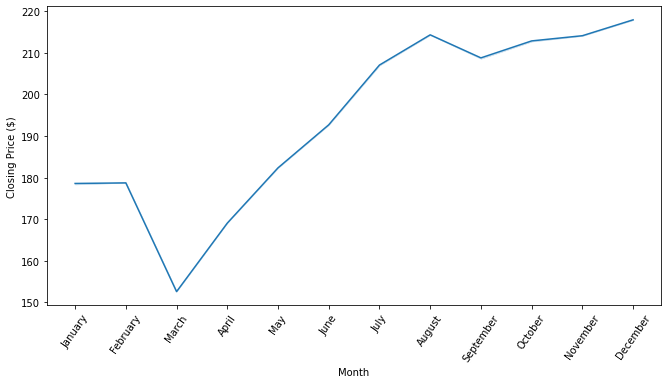

In [8]:
# Variation of MS stock prices over the given year

# Plotting  onthly mean of the closing prices
plt.figure(figsize = (11, 5.5))
sns.lineplot(data = df, x = 'Month', y = 'Close', ci = False);
plt.ylabel('Closing Price ($)');
plt.xticks(rotation = 55);

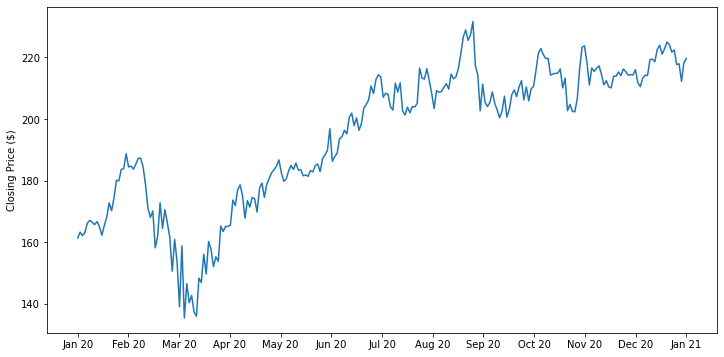

In [9]:
# Plotting daily changes of the closing prices

x_axis = np.linspace(df['Date'].min().timestamp(), df['Date'].max().timestamp(), df.shape[0])
x_ticks = np.linspace(df['Date'].min().timestamp(), df['Date'].max().timestamp(), 13)

plt.figure(figsize = (12, 6))
plt.plot(x_axis, df['Close']);
plt.xticks(ticks = x_ticks, labels = ['Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20',
                                      'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20', 'Jan 21']);
plt.ylabel('Closing Price ($)');

In [10]:
# Calculating the daily gains (percentage of increase or decrease)

df['Gain (%)'] = (df['Close'] - df['Close'].shift(1))/df['Close'].shift(1)*100
df.loc[0, 'Gain (%)'] = 2*df.loc[1, 'Gain (%)'] - df.loc[2, 'Gain (%)']
df.head()

,Date,Open,High,Low,Close,Day,Weekday,Month,Gain (%)
0,2020-01-10,162.82,163.22,161.18,161.34,10,Friday,January,3.11
1,2020-01-13,161.76,163.31,161.26,163.28,13,Monday,January,1.20
2,2020-01-14,163.39,163.60,161.72,162.13,14,Tuesday,January,-0.70
3,2020-01-15,162.62,163.94,162.57,163.18,15,Wednesday,January,0.65
4,2020-01-16,164.35,166.24,164.03,166.17,16,Thursday,January,1.83


In [12]:
# Plot the distribution of the stock average price in a day 

# Average price of a stock is calculated as mean of the high and low price on a day

df['Price_mean'] = (df['High'] + df['Low'])/2

df.head()

,Date,Open,High,Low,Close,Day,Weekday,Month,Gain (%),Price_mean
0,2020-01-10,162.82,163.22,161.18,161.34,10,Friday,January,3.11,162.20
1,2020-01-13,161.76,163.31,161.26,163.28,13,Monday,January,1.20,162.28
2,2020-01-14,163.39,163.60,161.72,162.13,14,Tuesday,January,-0.70,162.66
3,2020-01-15,162.62,163.94,162.57,163.18,15,Wednesday,January,0.65,163.26
4,2020-01-16,164.35,166.24,164.03,166.17,16,Thursday,January,1.83,165.14


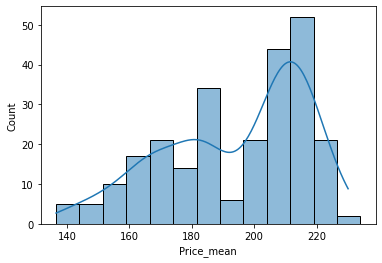

In [13]:
# Plotting the distribution of the stock price
sns.histplot(data = df, x = 'Price_mean', binwidth = 7.5, kde = True);

Observation: Stock price's distibution is far from normal, as expected, since the average price is steadily increasing over the year.

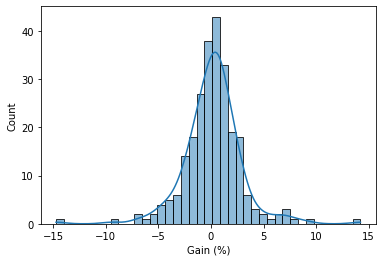

In [14]:
# Plotting the distribution of the percentage of the gain

sns.histplot(data = df, x = 'Gain (%)', kde = True);

Observation: On the other hand, the poercentage of daily gain or drop in the stock price has a fairly normal distribution.

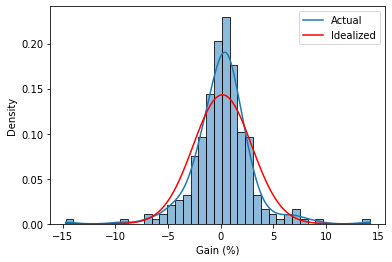

In [15]:
# Calculating the idealized normal distribution of daily gain

mu = df['Gain (%)'].mean()    # Gain's mean
sigma = df['Gain (%)'].std()  # Gain's std
x_gain = np.linspace(df['Gain (%)'].min(), df['Gain (%)'].max(), 100)

gain_ideal_density = stats.norm.pdf(x_gain, loc = mu, scale = sigma) 

sns.histplot(data = df, x = 'Gain (%)', kde = True, stat = 'density');
plt.plot(x_gain, gain_ideal_density, color = 'red');
plt.legend(['Actual', 'Idealized']);

In [19]:
mu

0.17333346807327377

In [18]:
# Calculating the probability of various drops in daily stock price changes

print('The probability of observing 5% or more daily drop in the stock price is ', 
      round(stats.norm.cdf(-5, mu, sigma)*100, 2), '%.', sep = '', end = '\n'*2)
print('The probability of observing 10% or more daily drop in the stock price is ', 
      round(stats.norm.cdf(-10, mu, sigma)*100, 3), '%.', sep = '')

The probability of observing 5% or more daily drop in the stock price is 3.16%.

The probability of observing 10% or more daily drop in the stock price is 0.013%.


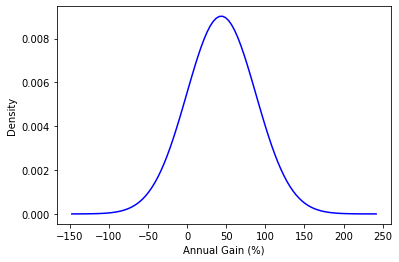

In [23]:
# Finding the idealized normal distribution of annual gain

mu_annual = mu*df.shape[0]        # Gain's mean
sigma_annual = sigma*np.sqrt(df.shape[0])  # Gain's std
x_annual = np.linspace(df['Gain (%)'].min()*10, 
                     df['Gain (%)'].max()*17, 100)

annual_gain = stats.norm.pdf(x_annual, loc = mu_annual, scale = sigma_annual) 

plt.plot(x_annual, annual_gain, color = 'blue');
plt.xlabel('Annual Gain (%)');
plt.ylabel('Density');

In [ ]:
# Calculating the probability of various drops in daily stock price changes

print('The probability of observing 50% or more annual loss is ', 
      round(stats.norm.cdf(-50, mu_annual, sigma_annual)*100, 2), '%.', sep = '', end = '\n'*2)
print('The probability of observing 25% or more annual loss is ', 
      round(stats.norm.cdf(-25, mu_annual, sigma_annual)*100, 2), '%.', sep = '', end = '\n'*2)

print('With 50% probability, the annual gain in stock price is ', 
      round(stats.norm.ppf(0.5, mu_annual, sigma_annual), 2), '%.', sep = '')

The probability of observing 50% or more annual loss is 1.7%.

The probability of observing 25% or more annual loss is 6.01%.

With 50% probability, the annual gain in stock price is 43.68%.
